In [1]:
from davitpy.models import *
from davitpy.pydarn.plotting import *
import datetime
import pandas
import feather
import numpy
from davitpy import utils
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from matplotlib.dates import date2num, DateFormatter
from matplotlib.ticker import LinearLocator
import seaborn as sns
import aacgmv2
%matplotlib inline
# import the sd-data overlay module
import os
import sys
module_path = os.path.abspath(os.path.join('../py/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import sd_scan_muh

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
steveGeoLat = 50.4452
steveGeoLon = -104.6189
coords = 'mag'
codes = ['wal','fhe','fhw','cve','cvw','bks']
beamCodes = {}#[ "cve", "fhw" ]
beamCodes["cve"] = [ 11 ]
beamCodes["fhw"] = [ 14 ]
# beamCodes["bks"] = [ 10 ]
steveTime = datetime.datetime( 2016, 7, 25, 5,50 )
camMlat, camMlon = aacgmv2.convert(steveGeoLat, steveGeoLon,\
                               300, steveTime)
camMLT = numpy.round( aacgmv2.convert_mlt( camMlon, steveTime ), 1 )
print camMlat, camMlon, camMLT

59.39003010038071 -38.49527771831717 22.3


In [3]:
# Some constants
eventDate = datetime.datetime(2016, 7, 25)#datetime.datetime(2011,5,16)
timeStart = datetime.datetime(2016, 7, 25, 4, 0)
timeEnd = datetime.datetime(2016, 7, 25, 7, 0)
sapsTime = steveTime#datetime.datetime(2016, 7, 25, 5, 30)#datetime.datetime(2011,5,16,8,36)
# SD plot variables
sapsRadList = [ "cvw", "cve","fhw",\
               "fhe", "bks", "wal" ]#[ "cvw" ]
sddata_type = "raw_los" 
selBeam = 9
sapsMlatRange = [ 50., 65. ]#[ 56., 60. ]
sapsVelCutoff = 50.
sapsNpointsCutoff = 50 # per radar per beam
velScale = [ -200, 200 ]
# SSUSI plot variables
ssusiDir = "../data/dmsp/ssusi/prcsd/" # Make sure you have this dir or create it
ssusiTime = datetime.datetime( 2016, 7, 25, 6, 0 )
coords="mlt"
satList = ["F18" ]
# TEC variables
tecScale = [ 0, 10 ]

/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (htt

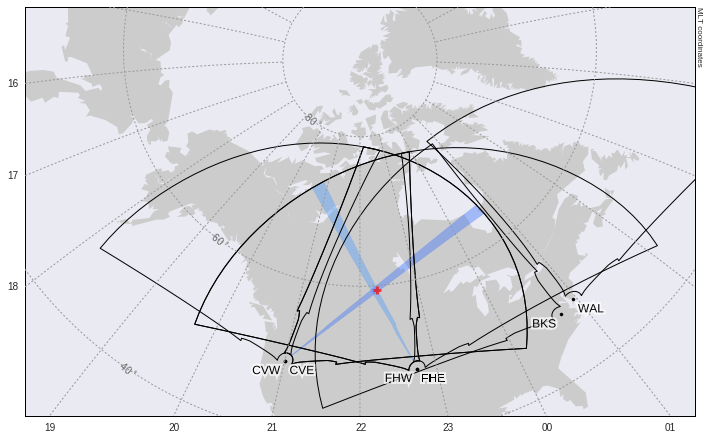

In [4]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
# set colorbar
seaMap = ListedColormap(sns.color_palette("Reds"))
m1 = utils.plotUtils.mapObj(lat_0=70., lon_0=-30, width=111e3*90,\
                      height=111e3*55, coords=coords, ax=ax, datetime=steveTime)
if coords == "mag":
    xVecGpsStn, yVecGpsStn = m1(camMlon, camMlat, coords=coords)
    m1.scatter( xVecGpsStn, yVecGpsStn, s=50., color="r", \
               alpha=0.7, zorder=8., edgecolor='none',\
               marker="x", linewidth='3' )
if coords == "mlt":
    xVecGpsStn, yVecGpsStn = m1(camMLT*15., camMlat, coords=coords)
    m1.scatter( xVecGpsStn, yVecGpsStn, s=50., color="r", \
               alpha=0.7, zorder=8., edgecolor='none', marker="+", linewidth='3' )
if coords == "geo":
    xVecGpsStn, yVecGpsStn = m1(steveGeoLon, steveGeoLat, coords=coords)
    m1.scatter( xVecGpsStn, yVecGpsStn, s=50., color="r", \
               alpha=0.7, zorder=8., edgecolor='none', marker="+", linewidth='3' )    
# Plotting some radars
overlayRadar(m1, fontSize=12, codes=codes)
# Plot radar fov
overlayFov(m1, codes=codes, maxGate=70)
# Plot corresponding beams
for br in beamCodes.keys():
    overlayFov(m1, codes=br, maxGate=70, beams=beamCodes[br])

In [5]:
# read velocities from the feather file
velsDF = feather.read_dataframe('../data/saps-vps-' +\
                eventDate.strftime("%Y%m%d") + '.feather')
velsDF.head()

,dateStr,timeStr,beam,range,azimCalcMag,vLos,power,spwdth,MLAT,MLON,MLT,GLAT,GLON,radId,radCode,date,normMLT
0,20160725,200,0,0,-31.8579,0.0000,11.3374,37.2005,38.6897,-146.2574,11.4109,43.7946,142.2906,41,hkw,2016-07-25 02:00:00,11.4109
1,20160725,200,0,1,-35.2038,0.0000,11.3374,46.0231,39.0370,-146.7567,11.3776,44.1381,141.7370,41,hkw,2016-07-25 02:00:00,11.3776
2,20160725,200,0,2,-37.7155,3.5175,8.9233,78.2254,39.3297,-147.2205,11.3467,44.4252,141.2232,41,hkw,2016-07-25 02:00:00,11.3467
3,20160725,200,0,3,-39.7328,6.5212,8.5291,46.0231,39.6014,-147.6740,11.3165,44.6902,140.7215,41,hkw,2016-07-25 02:00:00,11.3165
4,20160725,200,0,4,-41.4199,3.6386,8.9351,34.0043,39.8590,-148.1218,11.2866,44.9400,140.2269,41,hkw,2016-07-25 02:00:00,11.2866


In [6]:
# read TEC data from the feather file
tecDF = feather.read_dataframe('../data/tec-mf-' +\
                eventDate.strftime("%Y%m%d") + '.feather')
tecDF.head()

,dateStr,timeStr,Mlat,Mlon,med_tec,dlat,dlon,date,MLT
0,20160725,200,11.0,0.0,3.1,1.0,2.0,2016-07-25 02:00:00,21.165544
1,20160725,200,11.0,2.0,2.7,1.0,2.0,2016-07-25 02:00:00,21.298877
2,20160725,200,11.0,4.0,2.3,1.0,2.0,2016-07-25 02:00:00,21.432210
3,20160725,200,11.0,6.0,2.7,1.0,2.0,2016-07-25 02:00:00,21.565544
4,20160725,200,11.0,8.0,2.7,1.0,2.0,2016-07-25 02:00:00,21.698877


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


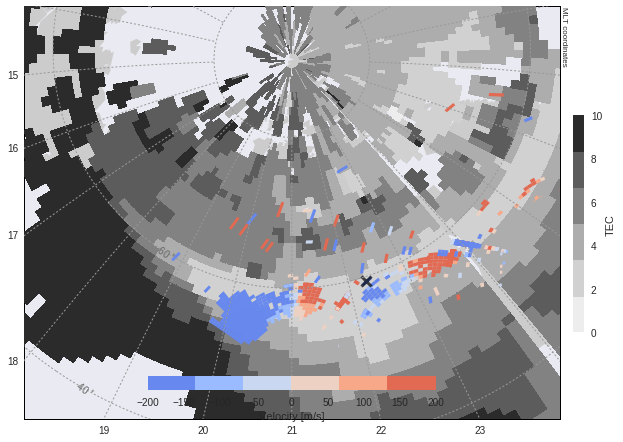

In [7]:
# set colorbar
tecSeaMap = ListedColormap(sns.color_palette("Greys"))
velSeaMap = ListedColormap( sns.color_palette("coolwarm") )
# Sometimes we dont have TEC data at the required time
# get the closest times where we have TEC data
minDT = 1e3
closestDate = None
for tt in tecDF["date"].unique():
    ts = (tt - numpy.datetime64('1970-01-01T00:00:00Z')) / numpy.timedelta64(1, 's')
    dt = datetime.datetime.utcfromtimestamp(ts)
    delDT = (dt-sapsTime).total_seconds()
    if abs(delDT) < abs(minDT):
        closestDate = tt
        minDT = delDT
selTecDF = tecDF[ tecDF["date"] == closestDate ].reset_index(drop=True)

# flatui = ["#3182bd", "#9ecae1", "#7fcdbb", "#ffeda0", "#feb24c", "#f03b20"]
# sns.set_palette(flatui)
# tecSeaMap = ListedColormap( sns.color_palette() )
# Plot map
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
m1 = utils.plotUtils.mapObj( coords=coords,\
                           lat_0=70., lon_0=-45, width=66e3*120,\
                           height=111e3*55, datetime=sapsTime)

# PLOT TEC Values
# xVec, yVec = m1(selTecDF["MLT"].values*15, selTecDF["Mlat"].values, coords=coords)

# tecPlot = m1.scatter( xVec, yVec , c=selTecDF["med_tec"], s=100.,\
#            cmap=tecSeaMap, alpha=0.7, zorder=5., \
#                      edgecolor='none', marker="s", vmin=0., vmax=15. )
plotTecDF = selTecDF[ ["MLT", "Mlat",\
                        "med_tec"] ].pivot( "MLT", "Mlat" )

mltVals = plotTecDF.index.values * 15.
mlatVals = plotTecDF.columns.levels[1].values

mltCntr, mlatCntr  = numpy.meshgrid( mltVals, mlatVals )
# Mask the nan values! pcolormesh can't handle them well!
medFTecVals = numpy.ma.masked_where(\
                numpy.isnan(plotTecDF["med_tec"].values),\
                plotTecDF["med_tec"].values)
tecPlot = m1.pcolormesh(mltCntr.T , mlatCntr.T, medFTecVals,\
                        cmap=tecSeaMap, vmin=tecScale[0],\
                        vmax=tecScale[1], zorder=7, latlon=True)

cbar = plt.colorbar(tecPlot, orientation='vertical',\
                    shrink=0.5, pad=-0.01)
cbar.set_label('TEC')
# PLOT TEC Values

obj = sd_scan_muh.sdvel_on_map(m1, ax, sapsRadList, sapsTime)
colNorm = Normalize( vmin=velScale[0], vmax=velScale[1] )
obj.overlay_raw_data(param="velocity", gsct=1,\
                     fill=True, vel_lim=velScale,\
                     zorder=9, cmap=velSeaMap, norm=colNorm, alpha=1.)

cax = plt.colorbar(obj.losvel_mappable,ax=ax,cmap=velSeaMap,\
             orientation='horizontal', shrink=0.5, pad=-0.1)

xVecGpsStn, yVecGpsStn = m1(camMLT*15., camMlat, coords=coords)
m1.scatter( xVecGpsStn, yVecGpsStn, s=100., color="k", \
           alpha=0.7, zorder=10., edgecolor='none', marker="x", linewidth='3' )

cax.set_label('Velocity [m/s]')
f.savefig("../plots/sd-steve-loc-" +\
            sapsTime.strftime("%Y%m%d") +\
            ".pdf" ,bbox_inches='tight')

In [8]:
rtiRadList = [ "fhw" ]
rtiSelBeamList = [14]

In [9]:
steveImgDir = "/home/bharat/Documents/steve-imgs/"
utDtCnv = 6 # hours
imgFileDict = {}
utDateList = []
for root, dirs, files in os.walk(steveImgDir):
    for fName in files:
        if ".jpg" not in fName:
            continue
        flDtSrc = fName.split(".jpg")[0]
        flDtList = [ int(x) for x in flDtSrc.split("-")[1:] ]
        currHour = flDtList[3]/10000
        currMin = (flDtList[3] - currHour*10000)/100
        currSec = flDtList[3] - currHour*10000 - currMin*100
        currDtObj =datetime.datetime( flDtList[0],\
                            flDtList[1], flDtList[2], currHour,\
                            currMin, currSec)
        currUtTime = currDtObj + datetime.timedelta(hours=utDtCnv)
        utDateList.append( currUtTime )
        imgFileDict[currUtTime] = root + "/" + fName

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


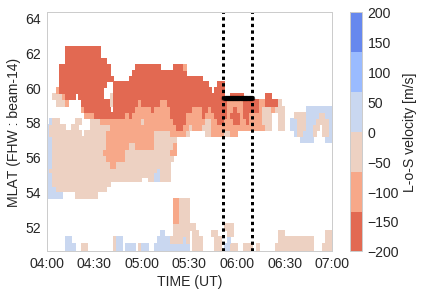

In [10]:
# sel data from a radar
selInd = 0
rtiDF = velsDF[ (velsDF["radCode"] == rtiRadList[selInd]) &\
              (velsDF["beam"] == rtiSelBeamList[selInd]) ]
param = "vLos"#"spwdth"
if param == "power":
    paramScale = [0,20]
    seaMap = ListedColormap(sns.color_palette("Reds"))
    cbarTitle = "Power"
elif param == "spwdth":
    paramScale = [0,100]
    seaMap = ListedColormap(sns.color_palette("Reds"))
    cbarTitle = "Sp. Width [m/s]"
else:
    paramScale = velScale
    seaMap = ListedColormap(sns.color_palette("coolwarm_r"))
    cbarTitle = "L-o-S velocity [m/s]"
# Make an RTIish Plot
# Seaborn styling
sns.set_style("whitegrid")
sns.set_context("paper")

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
rtiDF["dtNum"] = [ date2num(x) for x in rtiDF["date"] ]
plotDF = rtiDF[ ["MLAT", "dtNum",\
                        param] ].pivot( "MLAT", "dtNum" )
mlatVals = plotDF.index.values
timeVals = plotDF.columns.levels[1].values

timeCntr, mlatCntr  = numpy.meshgrid( timeVals, mlatVals )
# Mask the nan values! pcolormesh can't handle them well!
vLosVals = numpy.ma.masked_where(numpy.isnan(plotDF[param].values),plotDF[param].values)
rtiPlot = ax.pcolormesh(timeCntr, mlatCntr, vLosVals, cmap=seaMap, vmin=paramScale[0],vmax=paramScale[1])

# Overlay STEVE locations
for currUtTime in utDateList:
    ax.scatter( currUtTime, camMlat, s=100., color="k", marker=".",alpha=0.2 )

ax.set_xlim( [ timeStart, timeEnd ] )
ax.set_xlabel("TIME (UT)", fontsize=14)
ax.set_ylabel("MLAT (" + rtiRadList[selInd].upper() +\
              " : beam-" + str(rtiSelBeamList[selInd]) +")",\
             fontsize=14)
ax.get_xaxis().set_major_formatter(DateFormatter('%H:%M'))

# plot vertical lines
highLighDtList = [ min(utDateList),\
              max(utDateList) ]
# for nd in range(len(highLighDtList)-1):
#     ax.axvspan(highLighDtList[nd], highLighDtList[nd+1],\
#                alpha=0.4, color='grey')
ax.axvline( x=highLighDtList[0], c='k', linestyle=":", linewidth=3. )
ax.axvline( x=highLighDtList[1], c='k', linestyle=":", linewidth=3. )


plt.tick_params(axis='both', which='major', labelsize=14)

cbar = plt.colorbar(rtiPlot, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.set_label(cbarTitle, fontsize=14)
f.savefig("../plots/rti-" +\
            sapsTime.strftime("%Y%m%d") +\
            ".pdf" ,bbox_inches='tight')